In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#import xgboost 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Randy\anaconda3\envs\IBM Data Science Project\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# from google.colab import drive 
# drive.mount('/content/gdrive')

In [3]:
df = pd.read_csv('99 data_HDB.csv')

In [4]:
df.head()


,Index,Type,Address,Price,bed,bath,built sqft,land sqft,Price/psf,floor level,...,Penthouse,Aircon,Parking,Gym,Clubhouse,Min to MRT,MRT,District,Price/psf NEW,CHECKING
0,1,HDB,172 Lorong 1 Toa Payoh,868000,4,2.0,1335,NaN,650.19,NaN,...,NaN,NaN,NaN,NaN,NaN,15.0,Toa Payoh MRT,12.0,650.187266,0
1,2,HDB,40 Beo Crescent,350000,3,1.0,635,NaN,551.18,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,Tiong Bahru MRT,3.0,551.181102,0
2,3,HDB,202 Marsiling Drive,345000,2,2.0,731,NaN,471.96,Mid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,471.956224,0
3,4,HDB,17 Telok Blangah Crescent,790000,3,2.0,1291,NaN,611.93,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,611.928737,0
4,5,HDB,17 Telok Blangah Crescent,790000,3,2.0,1292,NaN,611.46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,611.455108,0


In [5]:
list(df)

['Index',
 'Type',
 'Address',
 'Price',
 'bed',
 'bath',
 'built sqft',
 'land sqft',
 'Price/psf',
 'floor level',
 'Built year',
 'Furnishing',
 'facing ',
 'overlooking',
 'tenure',
 'developer',
 'Bomb shelter',
 'Corner unit',
 'Utility room',
 'Renovated',
 'Balcony',
 'Penthouse',
 'Aircon',
 'Parking',
 'Gym',
 'Clubhouse',
 'Min to MRT',
 'MRT',
 'District',
 'Price/psf NEW',
 'CHECKING']

In [6]:
df.describe(include='all')

,Index,Type,Address,Price,bed,bath,built sqft,land sqft,Price/psf,floor level,...,Penthouse,Aircon,Parking,Gym,Clubhouse,Min to MRT,MRT,District,Price/psf NEW,CHECKING
count,5204.000000,5204,5204,5.204000e+03,5204.000000,5013.000000,5204.000000,0.0,5204.000000,1058,...,1,123,41,0.0,0.0,4282.000000,4282,5202.000000,5204.000000,5204
unique,NaN,1,2801,NaN,NaN,NaN,NaN,NaN,NaN,6,...,1,1,1,NaN,NaN,NaN,108,NaN,NaN,2
top,NaN,HDB,630 Senja Road,NaN,NaN,NaN,NaN,NaN,NaN,High,...,Y,Y,Y,NaN,NaN,NaN,Boon Keng MRT,NaN,NaN,0
freq,NaN,5204,31,NaN,NaN,NaN,NaN,NaN,NaN,594,...,1,123,41,NaN,NaN,NaN,194,NaN,NaN,4904
mean,2602.500000,NaN,NaN,6.053735e+05,2.854919,1.964093,1078.794197,NaN,596.434235,NaN,...,NaN,NaN,NaN,NaN,NaN,10.794021,NaN,16.850827,596.434110,NaN
std,1502.409731,NaN,NaN,1.976262e+05,0.594592,0.339457,553.019688,NaN,358.967870,NaN,...,NaN,NaN,NaN,NaN,NaN,5.479791,NaN,7.116200,358.967998,NaN
min,1.000000,NaN,NaN,2.350000e+05,0.000000,1.000000,100.000000,NaN,40.860000,NaN,...,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.000000,40.863981,NaN
25%,1301.750000,NaN,NaN,4.700000e+05,3.000000,2.000000,904.000000,NaN,470.345000,NaN,...,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,12.000000,470.343860,NaN
50%,2602.500000,NaN,NaN,5.680000e+05,3.000000,2.000000,1021.000000,NaN,534.410000,NaN,...,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,19.000000,534.405719,NaN
75%,3903.250000,NaN,NaN,7.200000e+05,3.000000,2.000000,1216.000000,NaN,636.517500,NaN,...,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,22.000000,636.517026,NaN


<AxesSubplot:>

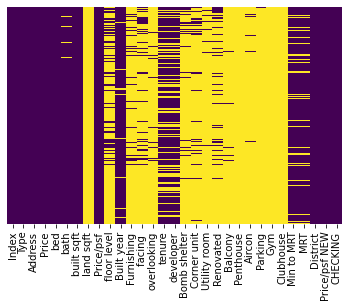

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.isnull().sum()

Index               0
Type                0
Address             0
Price               0
bed                 0
bath              191
built sqft          0
land sqft        5204
Price/psf           0
floor level      4146
Built year        346
Furnishing       4711
facing           4527
overlooking      5010
tenure           1249
developer        1262
Bomb shelter     4717
Corner unit      4638
Utility room     5049
Renovated        4393
Balcony          5113
Penthouse        5203
Aircon           5081
Parking          5163
Gym              5204
Clubhouse        5204
Min to MRT        922
MRT               922
District            2
Price/psf NEW       0
CHECKING            0
dtype: int64

In [9]:
df['floor level'].value_counts()

High         594
Low          227
Mid          180
Top           29
Ground        24
Penthouse      4
Name: floor level, dtype: int64

In [10]:
df['MRT'].value_counts()

Boon Keng MRT            194
Tiong Bahru MRT          175
Clementi MRT             120
Queenstown MRT           118
Ang Mo Kio MRT           118
                        ... 
Jalan Besar MRT            2
Novena MRT                 2
One-North MRT              2
HarbourFront MRT           2
Ten Mile Junction MRT      1
Name: MRT, Length: 108, dtype: int64

In [11]:

#df=df[df.Price != 'To be confirmed']
#df["Price"] = df["Price"].astype(int) 

In [12]:
df['bed'].value_counts()

3    3604
2    1088
4     429
1      51
0      13
5      12
6       7
Name: bed, dtype: int64

In [13]:
df['developer'].value_counts()

HDBNeighbourhoodBukit Merah                               362
HDBNeighbourhoodSengkang                                  352
HDBNeighbourhoodHougang                                   253
HDBNeighbourhoodQueenstown                                251
HDBNeighbourhoodPunggol                                   239
HDBNeighbourhoodKallang                                   230
HDBNeighbourhoodWoodlands                                 225
HDBNeighbourhoodToa Payoh                                 193
HDBNeighbourhoodBedok                                     157
HDBNeighbourhoodPasir Ris                                 144
HDBNeighbourhoodAng Mo Kio                                144
HDBNeighbourhoodJurong West                               143
HDBNeighbourhoodYishun                                    140
HDBNeighbourhoodBukit Batok                               138
HDBNeighbourhoodChoa Chu Kang                             113
HDBNeighbourhoodGeylang                                   100
HDBNeigh

In [14]:
df['Min to MRT'].value_counts()

5.0     1566
10.0    1098
15.0    1078
20.0     455
25.0      82
30.0       3
Name: Min to MRT, dtype: int64

In [15]:
df['overlooking'].fillna(('NIL'), inplace=True)

In [16]:
df['land sqft'].fillna((0), inplace=True)

In [17]:
df['facing '].value_counts()

North          133
North South    116
South          110
North East      73
East            59
South West      58
North West      54
South East      50
West            24
Name: facing , dtype: int64

In [18]:
list(df)

['Index',
 'Type',
 'Address',
 'Price',
 'bed',
 'bath',
 'built sqft',
 'land sqft',
 'Price/psf',
 'floor level',
 'Built year',
 'Furnishing',
 'facing ',
 'overlooking',
 'tenure',
 'developer',
 'Bomb shelter',
 'Corner unit',
 'Utility room',
 'Renovated',
 'Balcony',
 'Penthouse',
 'Aircon',
 'Parking',
 'Gym',
 'Clubhouse',
 'Min to MRT',
 'MRT',
 'District',
 'Price/psf NEW',
 'CHECKING']

In [19]:
df['Bomb shelter'].value_counts()

Y    487
Name: Bomb shelter, dtype: int64

In [20]:
df.drop('Bomb shelter', inplace=True, axis=1)

In [21]:
df['bath'].value_counts()

2.0    4482
1.0     361
3.0     163
4.0       6
8.0       1
Name: bath, dtype: int64

In [22]:
df['tenure'].value_counts()

99.0    3955
Name: tenure, dtype: int64

In [23]:
df['MRT'].value_counts()

Boon Keng MRT            194
Tiong Bahru MRT          175
Clementi MRT             120
Queenstown MRT           118
Ang Mo Kio MRT           118
                        ... 
Jalan Besar MRT            2
Novena MRT                 2
One-North MRT              2
HarbourFront MRT           2
Ten Mile Junction MRT      1
Name: MRT, Length: 108, dtype: int64

In [24]:
df['tenure'].fillna(('99'), inplace=True)
df['Corner unit'].fillna(('N'), inplace=True)
df['Renovated'].fillna(('N'), inplace=True)
df['Penthouse'].fillna(('N'), inplace=True)
df['Clubhouse'].fillna(('N'), inplace=True)
df['Furnishing'].fillna(('N'), inplace=True)
df['Min to MRT'].fillna((120), inplace=True)
df['land sqft'].fillna((0), inplace=True)

df['floor level'].fillna(('NA'), inplace=True)


In [25]:
df['tenure'].value_counts()


99.0    3955
99      1249
Name: tenure, dtype: int64

In [26]:
df['Price'].value_counts()

550000     135
650000     123
500000     101
480000      99
450000      97
          ... 
429944       1
642888       1
349999       1
689949       1
1450000      1
Name: Price, Length: 509, dtype: int64

In [27]:
df['Min to MRT'].value_counts()

5.0      1566
10.0     1098
15.0     1078
120.0     922
20.0      455
25.0       82
30.0        3
Name: Min to MRT, dtype: int64

In [28]:
df['Corner unit'].value_counts()

N    4638
Y     566
Name: Corner unit, dtype: int64

In [29]:
df.drop(['Utility room','Type','Unnamed: 0','Address','bath','Price/psf','Bomb shelter','Utility room','Balcony','MRT','Price/psf NEW'], inplace=True, axis=1)

KeyError: "['Unnamed: 0' 'Bomb shelter'] not found in axis"

In [ ]:
df.drop(['Address','CHECKING','Parking','Balcony','facing ','Gym','MRT'], axis=1, inplace=True)



In [ ]:
df.drop(['developer'], axis=1, inplace=True)

In [ ]:
df.drop(['built sqft'>4000], axis=0, inplace=True)

In [ ]:
df['Built year'].fillna((df['Built year'].median()), inplace=True)
df['age'] = 2021 - df['Built year']

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.drop(['Address'], axis=1, inplace=True)

In [ ]:
df.drop(['Balcony','facing ','MRT'], axis=1, inplace=True)

In [ ]:
df.drop(['Type'], axis=1, inplace=True)

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Renovated']= (df['Renovated'] > 'N').astype(int)
df['Corner unit']= (df['Corner unit'] > 'N').astype(int)
df['Min to MRT']= (df['Min to MRT'] > 'N').astype(int)

df["Corner unit"] = df["Corner unit"].astype(bool) 
df["Renovated"] = df["Renovated"].astype(bool) 
df["Min to MRT"] = df["Min to MRT"].astype(bool) 

In [ ]:
df.shape

In [ ]:
list(df)

In [ ]:
columns=['floor level', 'overlooking','facing ']

In [ ]:
len(columns)

In [ ]:
final_df=df

In [ ]:
list(final_df)

In [ ]:
def category_onehot_multcols(multcolumns):
  df_final = final_df
  i = 0
  for fields in multcolumns:
    print(fields)
    df1=pd.get_dummies(final_df[fields],drop_first=True)

    if i==0:
      df_final=df1.copy()
    else:
      df_final=pd.concat([df_final,df1],axis=1)
    i=i+1

  df_final=pd.concat([final_df,df_final], axis=1)
  return df_final

In [ ]:
final_df = category_onehot_multcols(columns)

In [ ]:
final_df.shape

In [ ]:
list(final_df)

In [ ]:
df['floor level'].value_counts()

In [ ]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
final_df.drop(['floor level','overlooking','facing '], axis=1, inplace=True)

In [ ]:
final_df.head()

In [ ]:
list(final_df)

In [ ]:
final_df["bed"] = final_df["bed"].astype(int) 

final_df["built sqft"] = final_df["built sqft"].astype(int) 

final_df["Price"] = final_df["Price"].astype(int) 

In [ ]:
#final_df.drop(final_df.index[final_df['built sqft']>4000],  inplace=True)

In [ ]:
final_df.describe()

In [ ]:
import seaborn  as sns 
sns.regplot(x='built sqft', y='Price', data=final_df) 

In [ ]:
sns.boxplot(x='District', y='Price', data=final_df, hue='bed')

In [ ]:
features=['Price','bed','built sqft','Corner unit','Renovated','Min to MRT','District','Age of Flat',
 'Low','Mid', 'nil',
 'Garden view', 'Greenery view','Nil','Pool view','Sea view',
 'North', 'North East','North South','North West','South','South East','South West','West']
               
                

In [ ]:
#features=['bed','bath','built sqft','land sqft','Min to MRT','age','Exec Condo ','Exec HDB','HDB','House','High','Low','Mid','NA','Top','N','P','U','Garden view','Greenery view','NIL','Pool view','Sea view','Y',2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,25.0,26.0,27.0,28.0]

In [ ]:
#split data into x and y variables
xVar = final_df[features]
 
yVar = final_df['Price']

In [ ]:
final_df.head()

In [ ]:
#Far=final_df.iloc[0:10,5]
#print('a',Far,'a')

In [ ]:

xtrain, xtest, ytrain, ytest = train_test_split(xVar, yVar, test_size=0.2)

In [ ]:
xtrain.describe(include='all')

In [ ]:
ytest.describe()

In [ ]:
final_df.head()

In [ ]:
df.head()

In [ ]:
model = xgboost.XGBRFRegressor()
model.fit(xtrain,ytrain)

In [ ]:
ytrain.head

In [ ]:
predictions_T = model.predict(xtrain)

In [ ]:
y_hat_test = model.predict(xtest)

plt.scatter(ytrain, predictions_T)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.scatter(ytest, y_hat_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_hat_test))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_hat_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_hat_test)))
print('Root Mean Squared Logarithmic Error:', np.sqrt(metrics.mean_squared_error(ytest, y_hat_test)))

In [ ]:
(df.corr()**2)["Price"].sort_values(ascending = False)[:20] 

In [ ]:
ypred = model.predict(xtest) #predicting the values y_pred

In [ ]:
ypred,yVar 

In [ ]:
Pred = pd.DataFrame(ypred, columns=['Price'])
df1 = pd.concat([yVar, Pred], axis=1)


In [ ]:
df1

In [ ]:
df1.plot(kind='line',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='white')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()